第一步需要通过SMOTE方法把因变量1变成和0相同的数量 然后按照7:3进行
选择4种方法逻辑回归、随机森林、SVM、加上LGBM算出那些性能的值
做个矩阵，然后根据预测值算出来roc，加上贡献度

1.先把数据7：3分训练集和测试集。2.在训练集中，采用欠采样方法，对0进行分层。3.按照年龄比例进行分层1占比6%2占比29%3占比60%4占比5%。4.例如1是239，那么0一共就抽就是879，大概就是3倍（训练集中肯定小于这个数）。

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
all = pd.read_excel(r'C:\Users\zzxxhh\Desktop\work\舌头图像识别\多分类\数据\机器学习筛选变量.xlsx')
print(all.shape)
all.head()

(4723, 13)


,CODE_A,age,smoke,insomnia,sweating,loose teeth,dry skin,polyuria,purple tongue,dark red tongue,yellow coating,thick coating,greasy coating
0,1,4,1,0,0,0,0,0,0,0,0,0,0
1,1,4,0,1,0,0,0,0,0,0,0,1,0
2,1,4,0,1,0,1,0,0,0,0,0,0,0
3,1,4,0,0,0,1,0,0,0,0,0,0,0
4,1,4,0,1,0,1,0,0,0,0,0,0,0


In [3]:
y = all.CODE_A
x = all.drop('CODE_A',1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
train = x_train
train['CODE_A'] = y_train

C:\Users\zzxxhh\AppData\Local\Temp/ipykernel_51832/2182023366.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = all.drop('CODE_A',1)


In [4]:
#使用SMOTE方法进行过抽样处理
from imblearn.over_sampling import SMOTE #过抽样处理库SMOTE

model_smote=SMOTE()
x_smote_resampled,y_smote_resampled=model_smote.fit_resample(x,y)  # 输入数据进行过抽样处理
y_smote_resampled=pd.DataFrame(y_smote_resampled,columns=['CODE_A'])

smote_resampled=pd.concat([x_smote_resampled,y_smote_resampled],axis=1)  # 将特征和标签重新拼接
group_data_smote=smote_resampled.groupby(['CODE_A'])['CODE_A'].count()   # 查看标签类别个数
group_data_smote

CODE_A
0    4430
1    4430
Name: CODE_A, dtype: int64

In [5]:
smote_resampled.to_csv('smote.csv')

smote

In [6]:
y_smote = smote_resampled.CODE_A
x_smote = smote_resampled.drop('CODE_A',1)
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

C:\Users\zzxxhh\AppData\Local\Temp/ipykernel_51832/1586093518.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_smote = smote_resampled.drop('CODE_A',1)


# 逻辑回归

In [7]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
log_reg.fit(x_train, y_train)
test_data_proba = log_reg.predict(x_test)

准确率： 0.674191121143717
精确率： 0.6605504587155964
召回率： 0.708554125662377
F1值: 0.6837107377647919
AUC:  0.6743967337361997


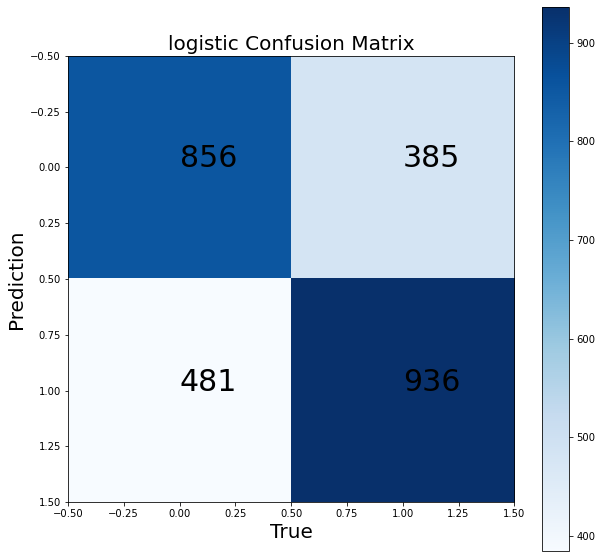

In [8]:
confusion_log= confusion_matrix(y_test, test_data_proba)

print("准确率：",accuracy_score(y_test, test_data_proba))
print("精确率：",precision_score(y_test, test_data_proba))
print("召回率：",recall_score(y_test, test_data_proba))
print("F1值:", f1_score(y_test, test_data_proba))
print("AUC: ",roc_auc_score(y_test, test_data_proba))

plt.figure(figsize = (10,10))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion_log, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('True',size = 20)
plt.ylabel('Prediction', size = 20)
plt.title('logistic Confusion Matrix',size = 20)
# 显示数据
for first_index in range(len(confusion_log)):    #第几行
    for second_index in range(len(confusion_log[first_index])):    #第几列
        plt.text(first_index, second_index, confusion_log[first_index][second_index],size = 30)

plt.savefig('logistic.tif')

Text(0, 0.5, 'TPR')

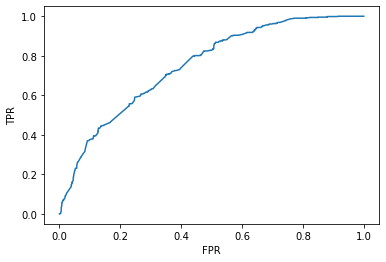

In [9]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,log_reg.decision_function(x_test))
 
plt.plot(fpr,tpr,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

# 随机森林

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf = rf.fit(x_train, y_train) 
predict_rf=model_rf.predict(x_test)

准确率： 0.7671181339352897
精确率： 0.7182835820895522
召回率： 0.874337623012869
F1值: 0.7886650734038921
AUC:  0.7677596865999273


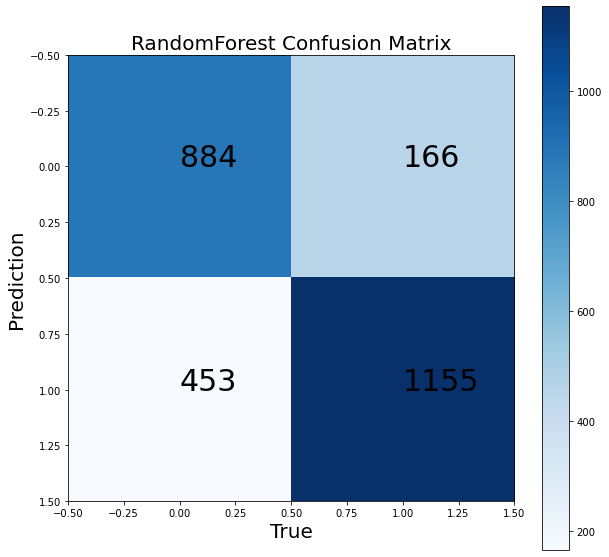

In [11]:
confusion_rf= confusion_matrix(y_test, predict_rf)

print("准确率：",accuracy_score(y_test, predict_rf))
print("精确率：",precision_score(y_test, predict_rf))
print("召回率：",recall_score(y_test, predict_rf))
print("F1值:", f1_score(y_test, predict_rf))
print("AUC: ",roc_auc_score(y_test, predict_rf))

plt.figure(figsize = (10,10))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion_rf, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('True',size = 20)
plt.ylabel('Prediction', size = 20)
plt.title('RandomForest Confusion Matrix',size = 20)
# 显示数据
for first_index in range(len(confusion_rf)):    #第几行
    for second_index in range(len(confusion_rf[first_index])):    #第几列
        plt.text(first_index, second_index, confusion_rf[first_index][second_index],size = 30)

plt.savefig('rf.tif')

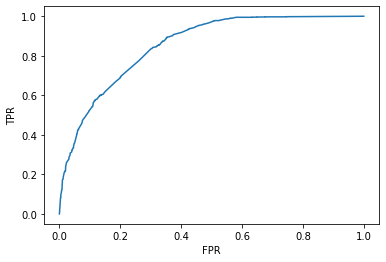

In [12]:
fpr,tpr, thresholds = roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('lr.tif')

In [13]:
model_rf.feature_importances_

array([0.15277223, 0.08484294, 0.0859529 , 0.11453685, 0.0667581 ,
       0.0689051 , 0.02373473, 0.06403119, 0.11018701, 0.06969214,
       0.07883528, 0.07975153])

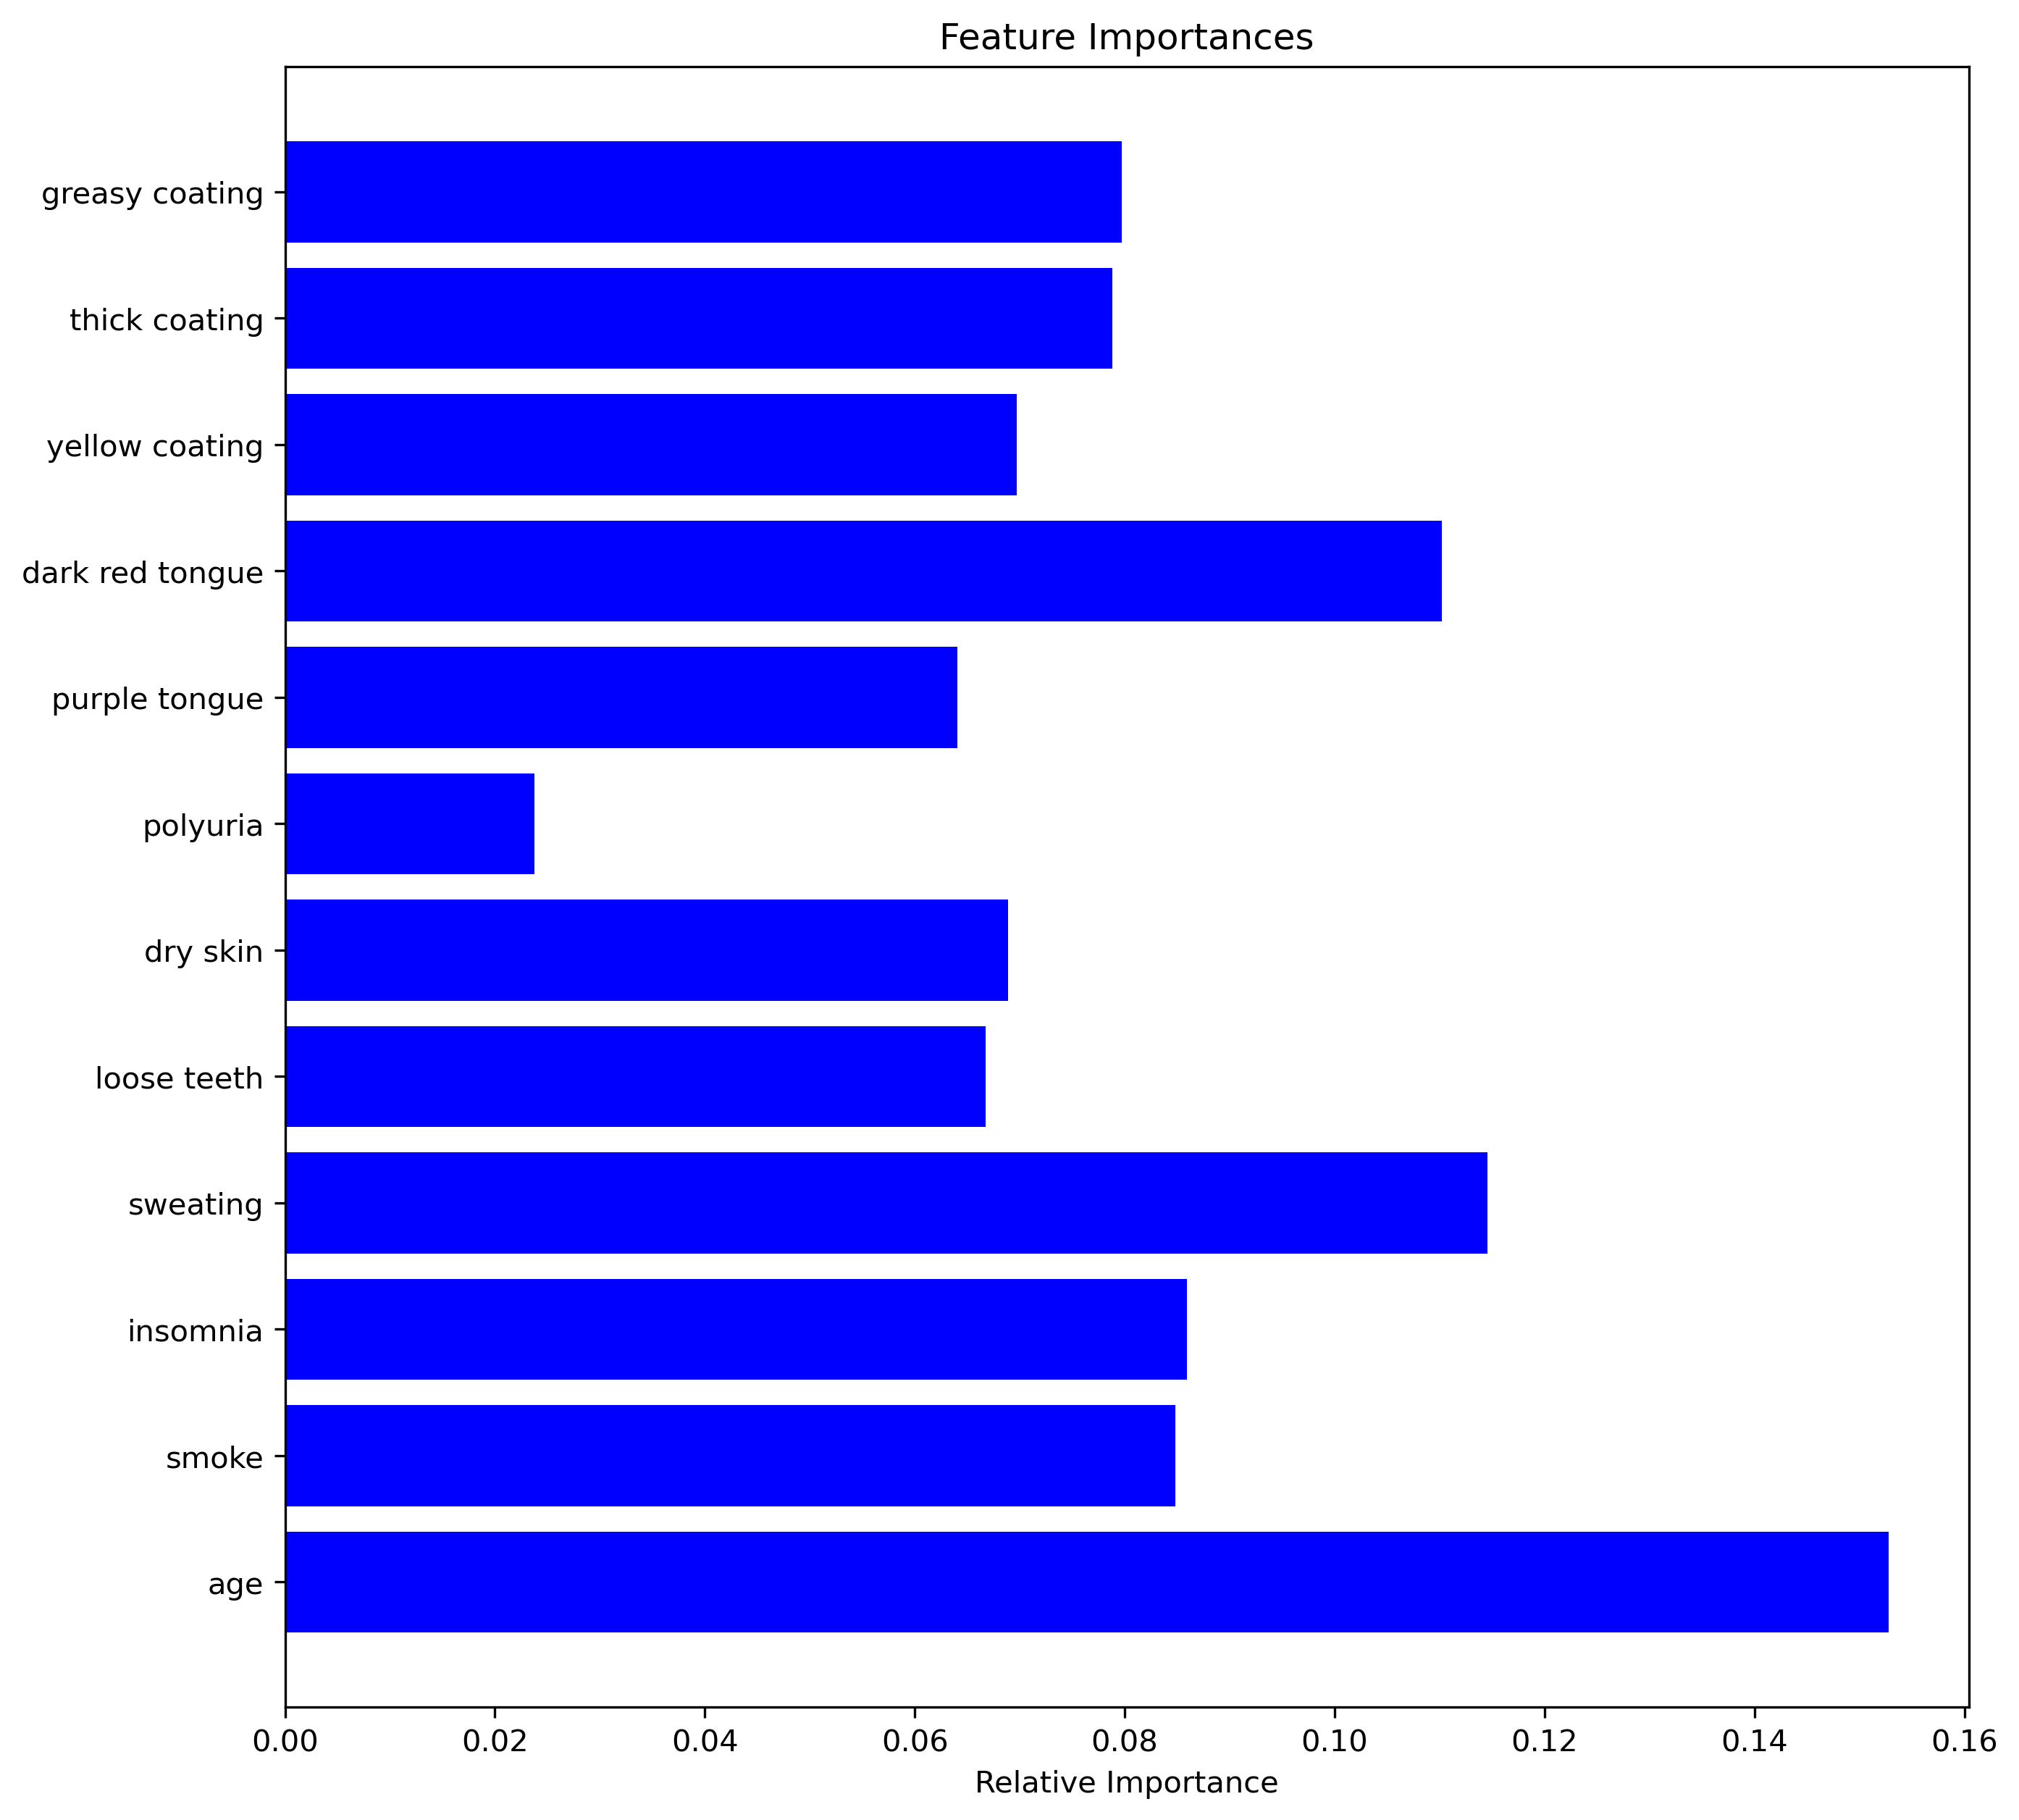

In [24]:
plt.rcParams["savefig.dpi"] =300
plt.rcParams["figure.dpi"] =300# 高清

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(x_train.columns,model_rf.feature_importances_, color='b', align='center')
plt.xlabel('Relative Importance') 

plt.savefig('lr_feaimport.tif')

# model_rf.

# SVM

In [15]:
from sklearn.svm import SVC
clf = SVC()
model_svc = clf.fit(x_train, y_train) 
predict_svc=model_svc.predict(x_test)

准确率： 0.7136945071482318
精确率： 0.6647058823529411
召回率： 0.8554125662376987
F1值: 0.7480966567361801
AUC:  0.7145424835676153


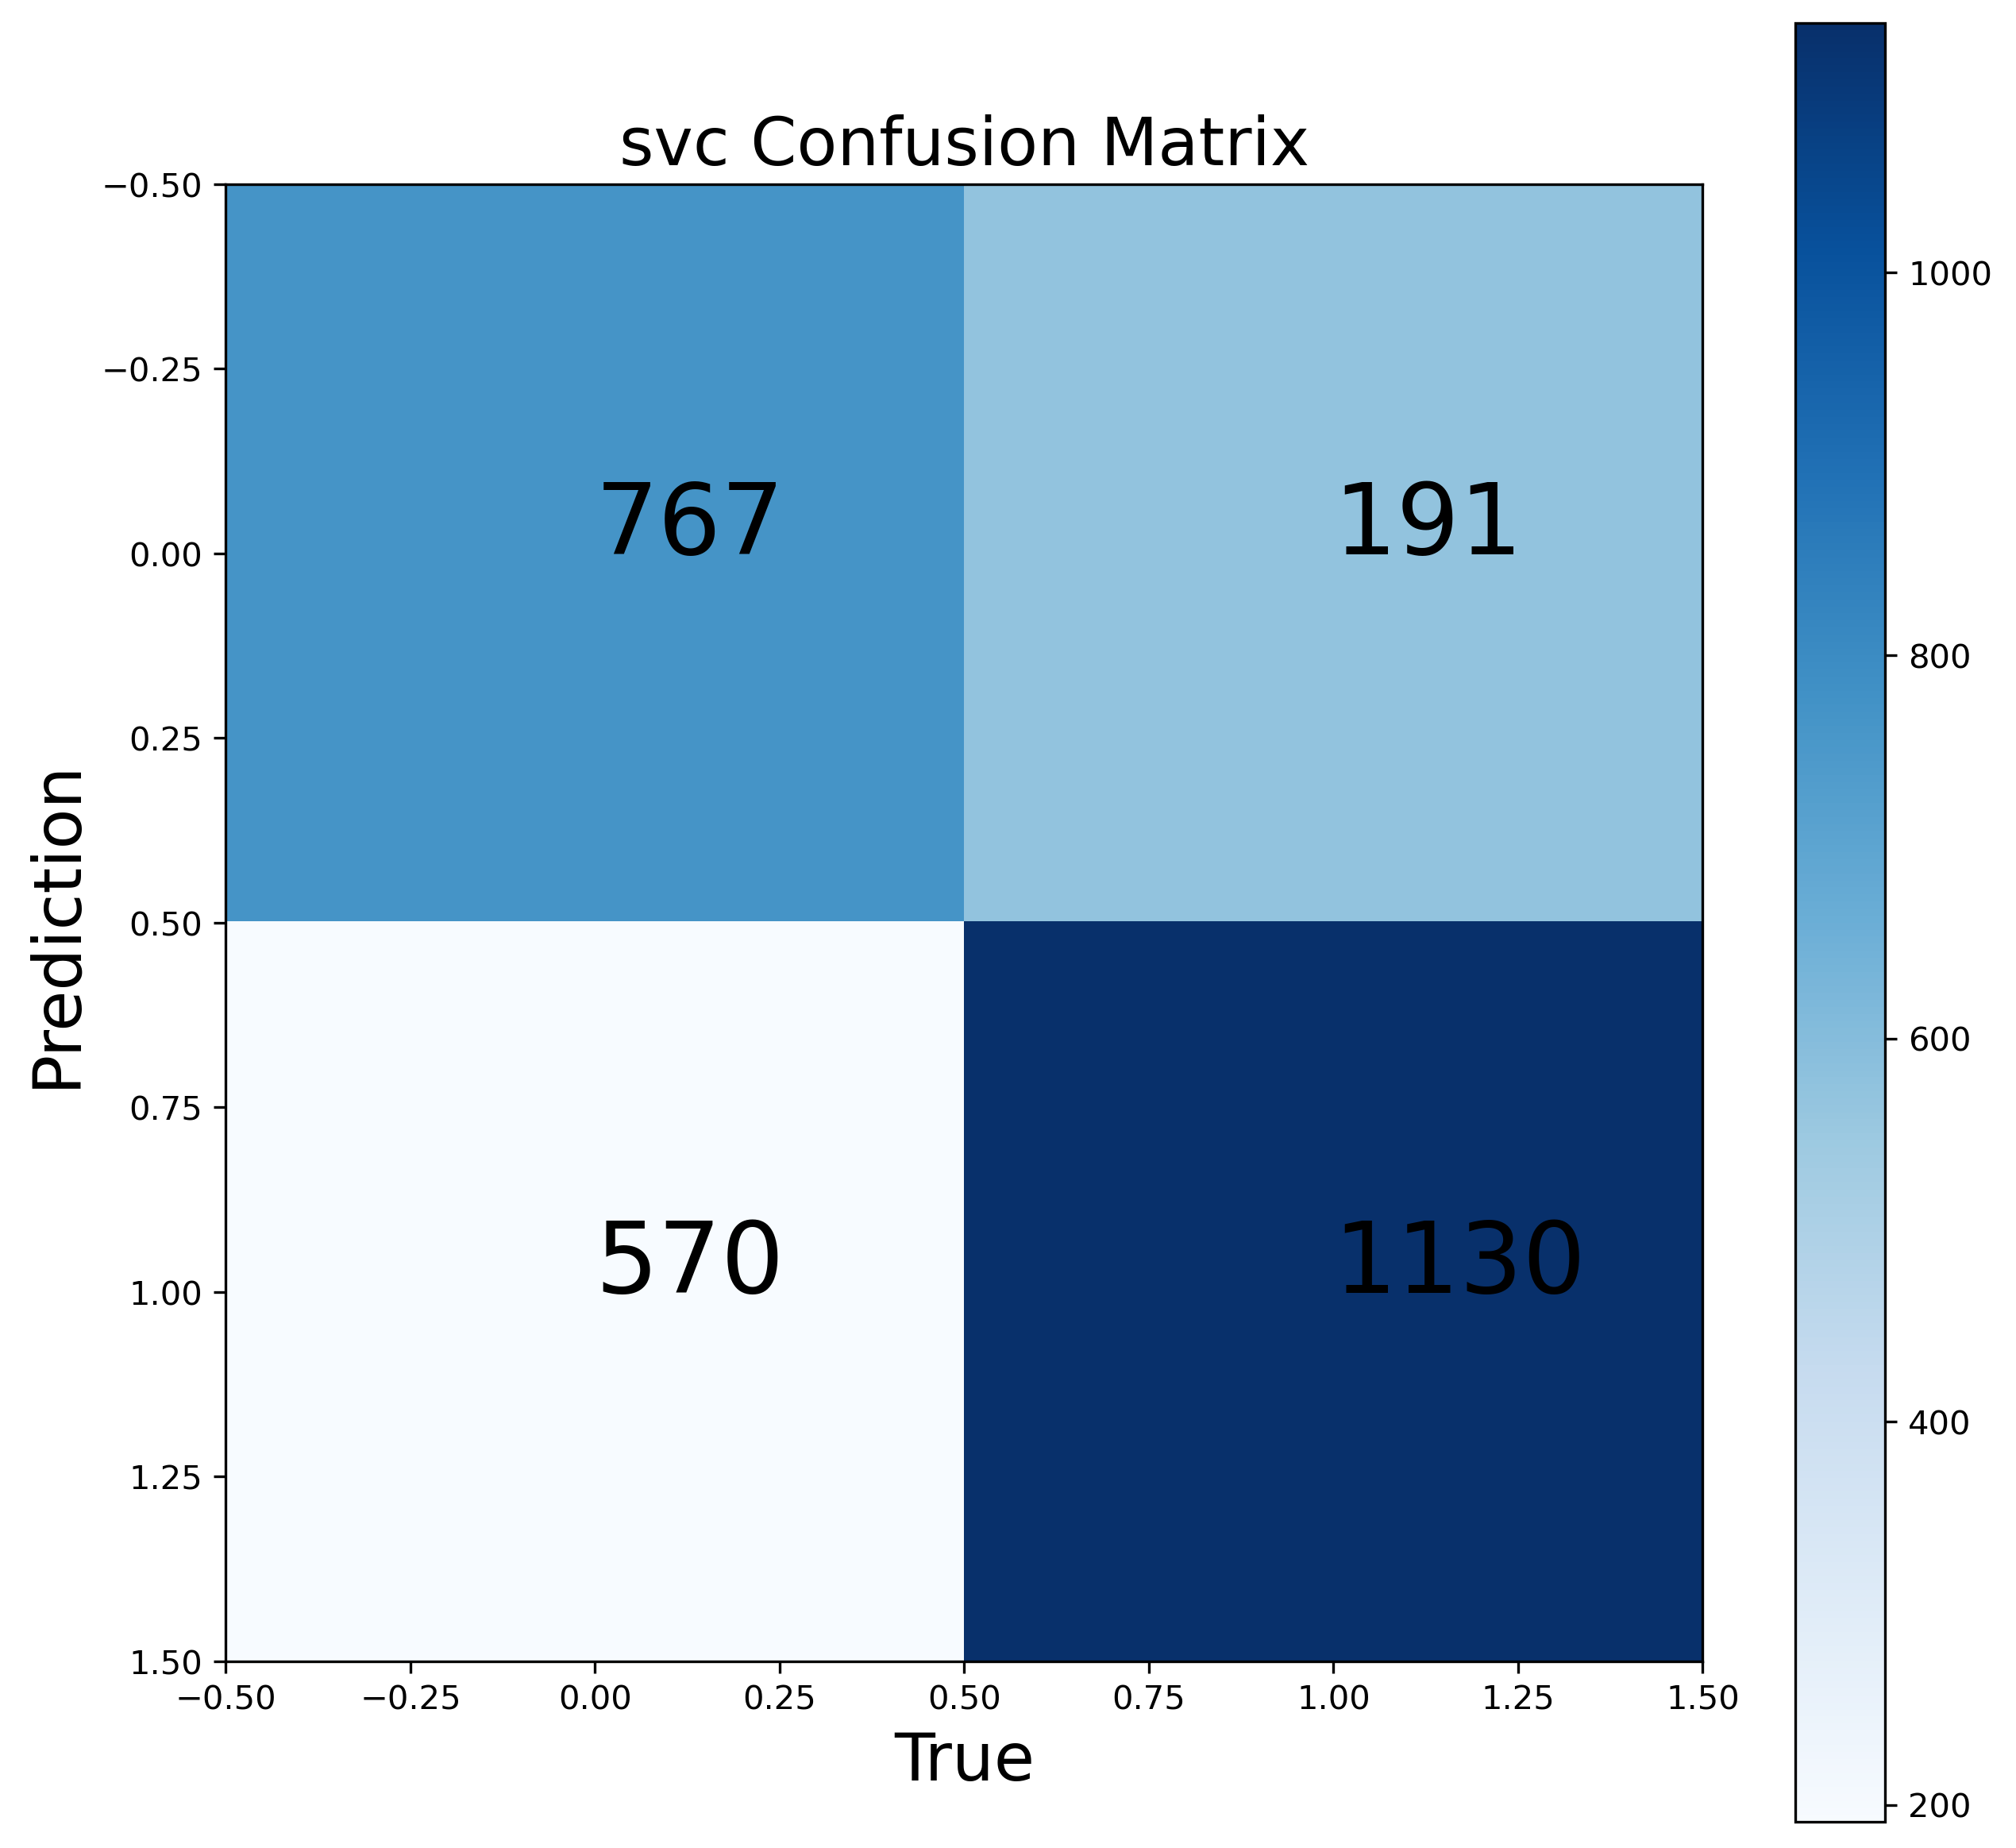

In [16]:
confusion_svc= confusion_matrix(y_test, predict_svc)

print("准确率：",accuracy_score(y_test, predict_svc))
print("精确率：",precision_score(y_test, predict_svc))
print("召回率：",recall_score(y_test, predict_svc))
print("F1值:", f1_score(y_test, predict_svc))
print("AUC: ",roc_auc_score(y_test, predict_svc))

plt.figure(figsize = (10,10))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion_svc, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('True',size = 20)
plt.ylabel('Prediction', size = 20)
plt.title('svc Confusion Matrix',size = 20)
# 显示数据
for first_index in range(len(confusion_svc)):    #第几行
    for second_index in range(len(confusion_svc[first_index])):    #第几列
        plt.text(first_index, second_index, confusion_svc[first_index][second_index],size = 30)

plt.savefig('svc.tif')

Text(0, 0.5, 'TPR')

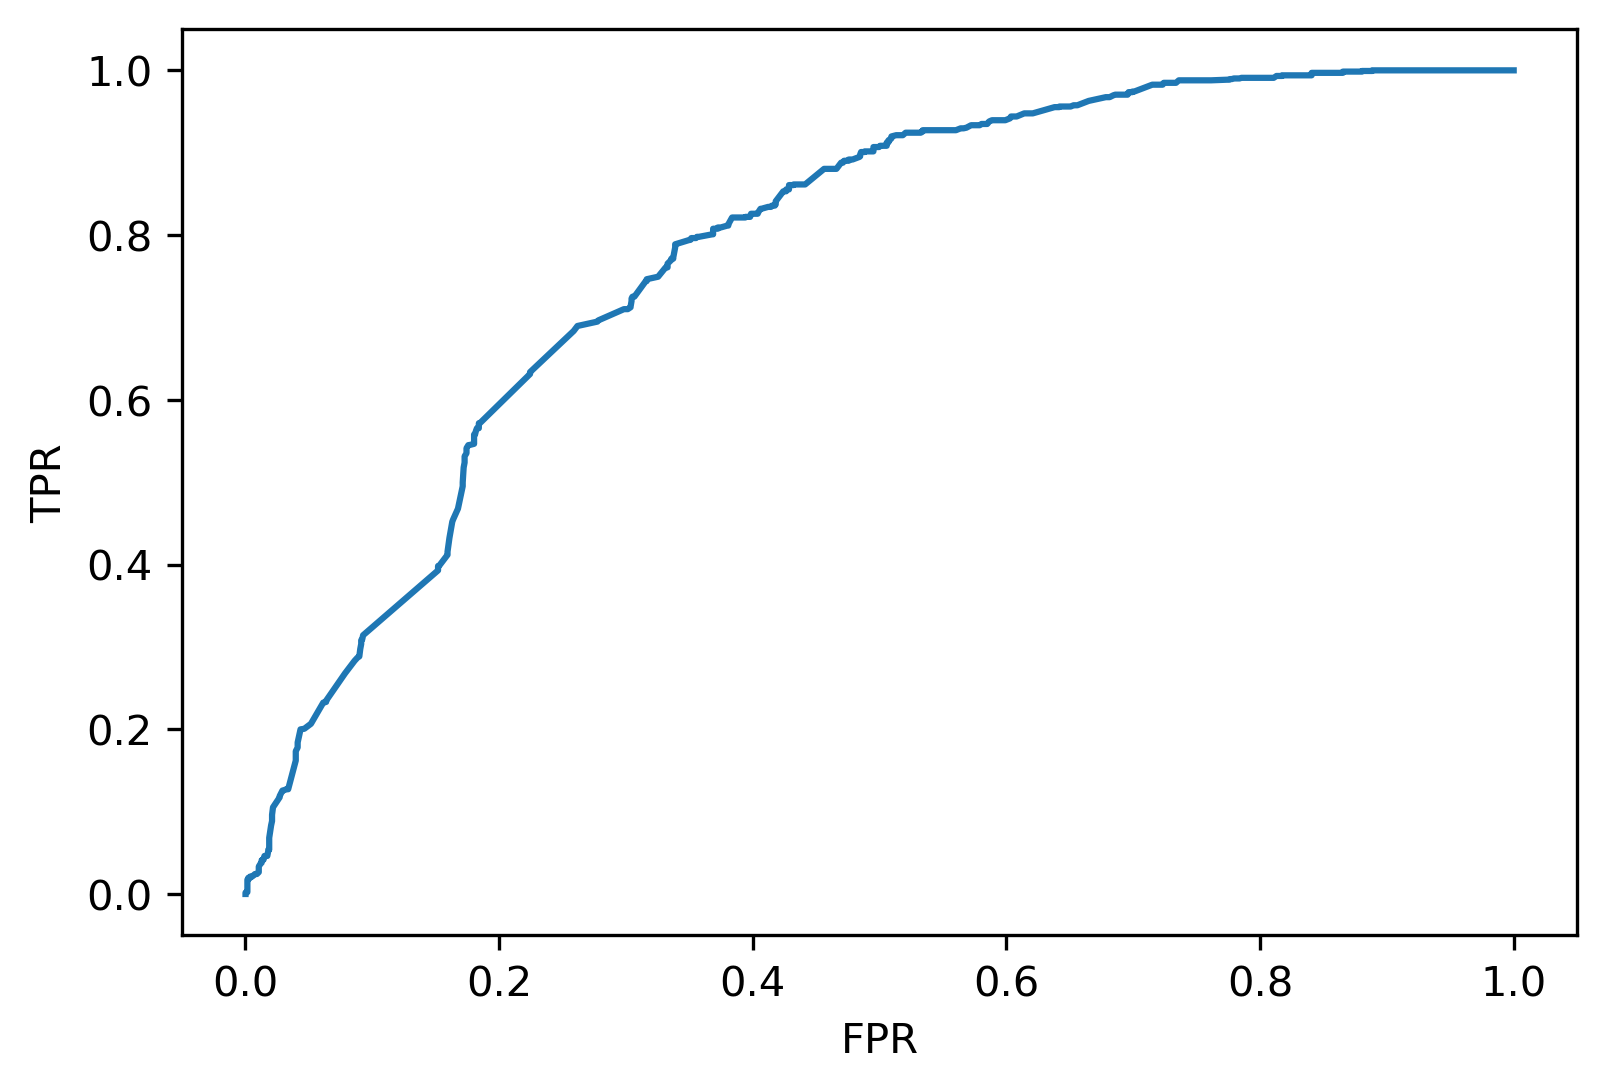

In [17]:

from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,model_svc.decision_function(x_test))
 
plt.plot(fpr,tpr,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

# LGBM

In [18]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(probability=True)
model_gbm = gbm.fit(x_train, y_train) 
predict_gbm=model_gbm.predict(x_test)

[LightGBM] [Warning] Unknown parameter: probability


准确率： 0.7584650112866818
精确率： 0.7066342057212416
召回率： 0.8788796366389099
F1值: 0.7834008097165991
AUC:  0.7591855176463062


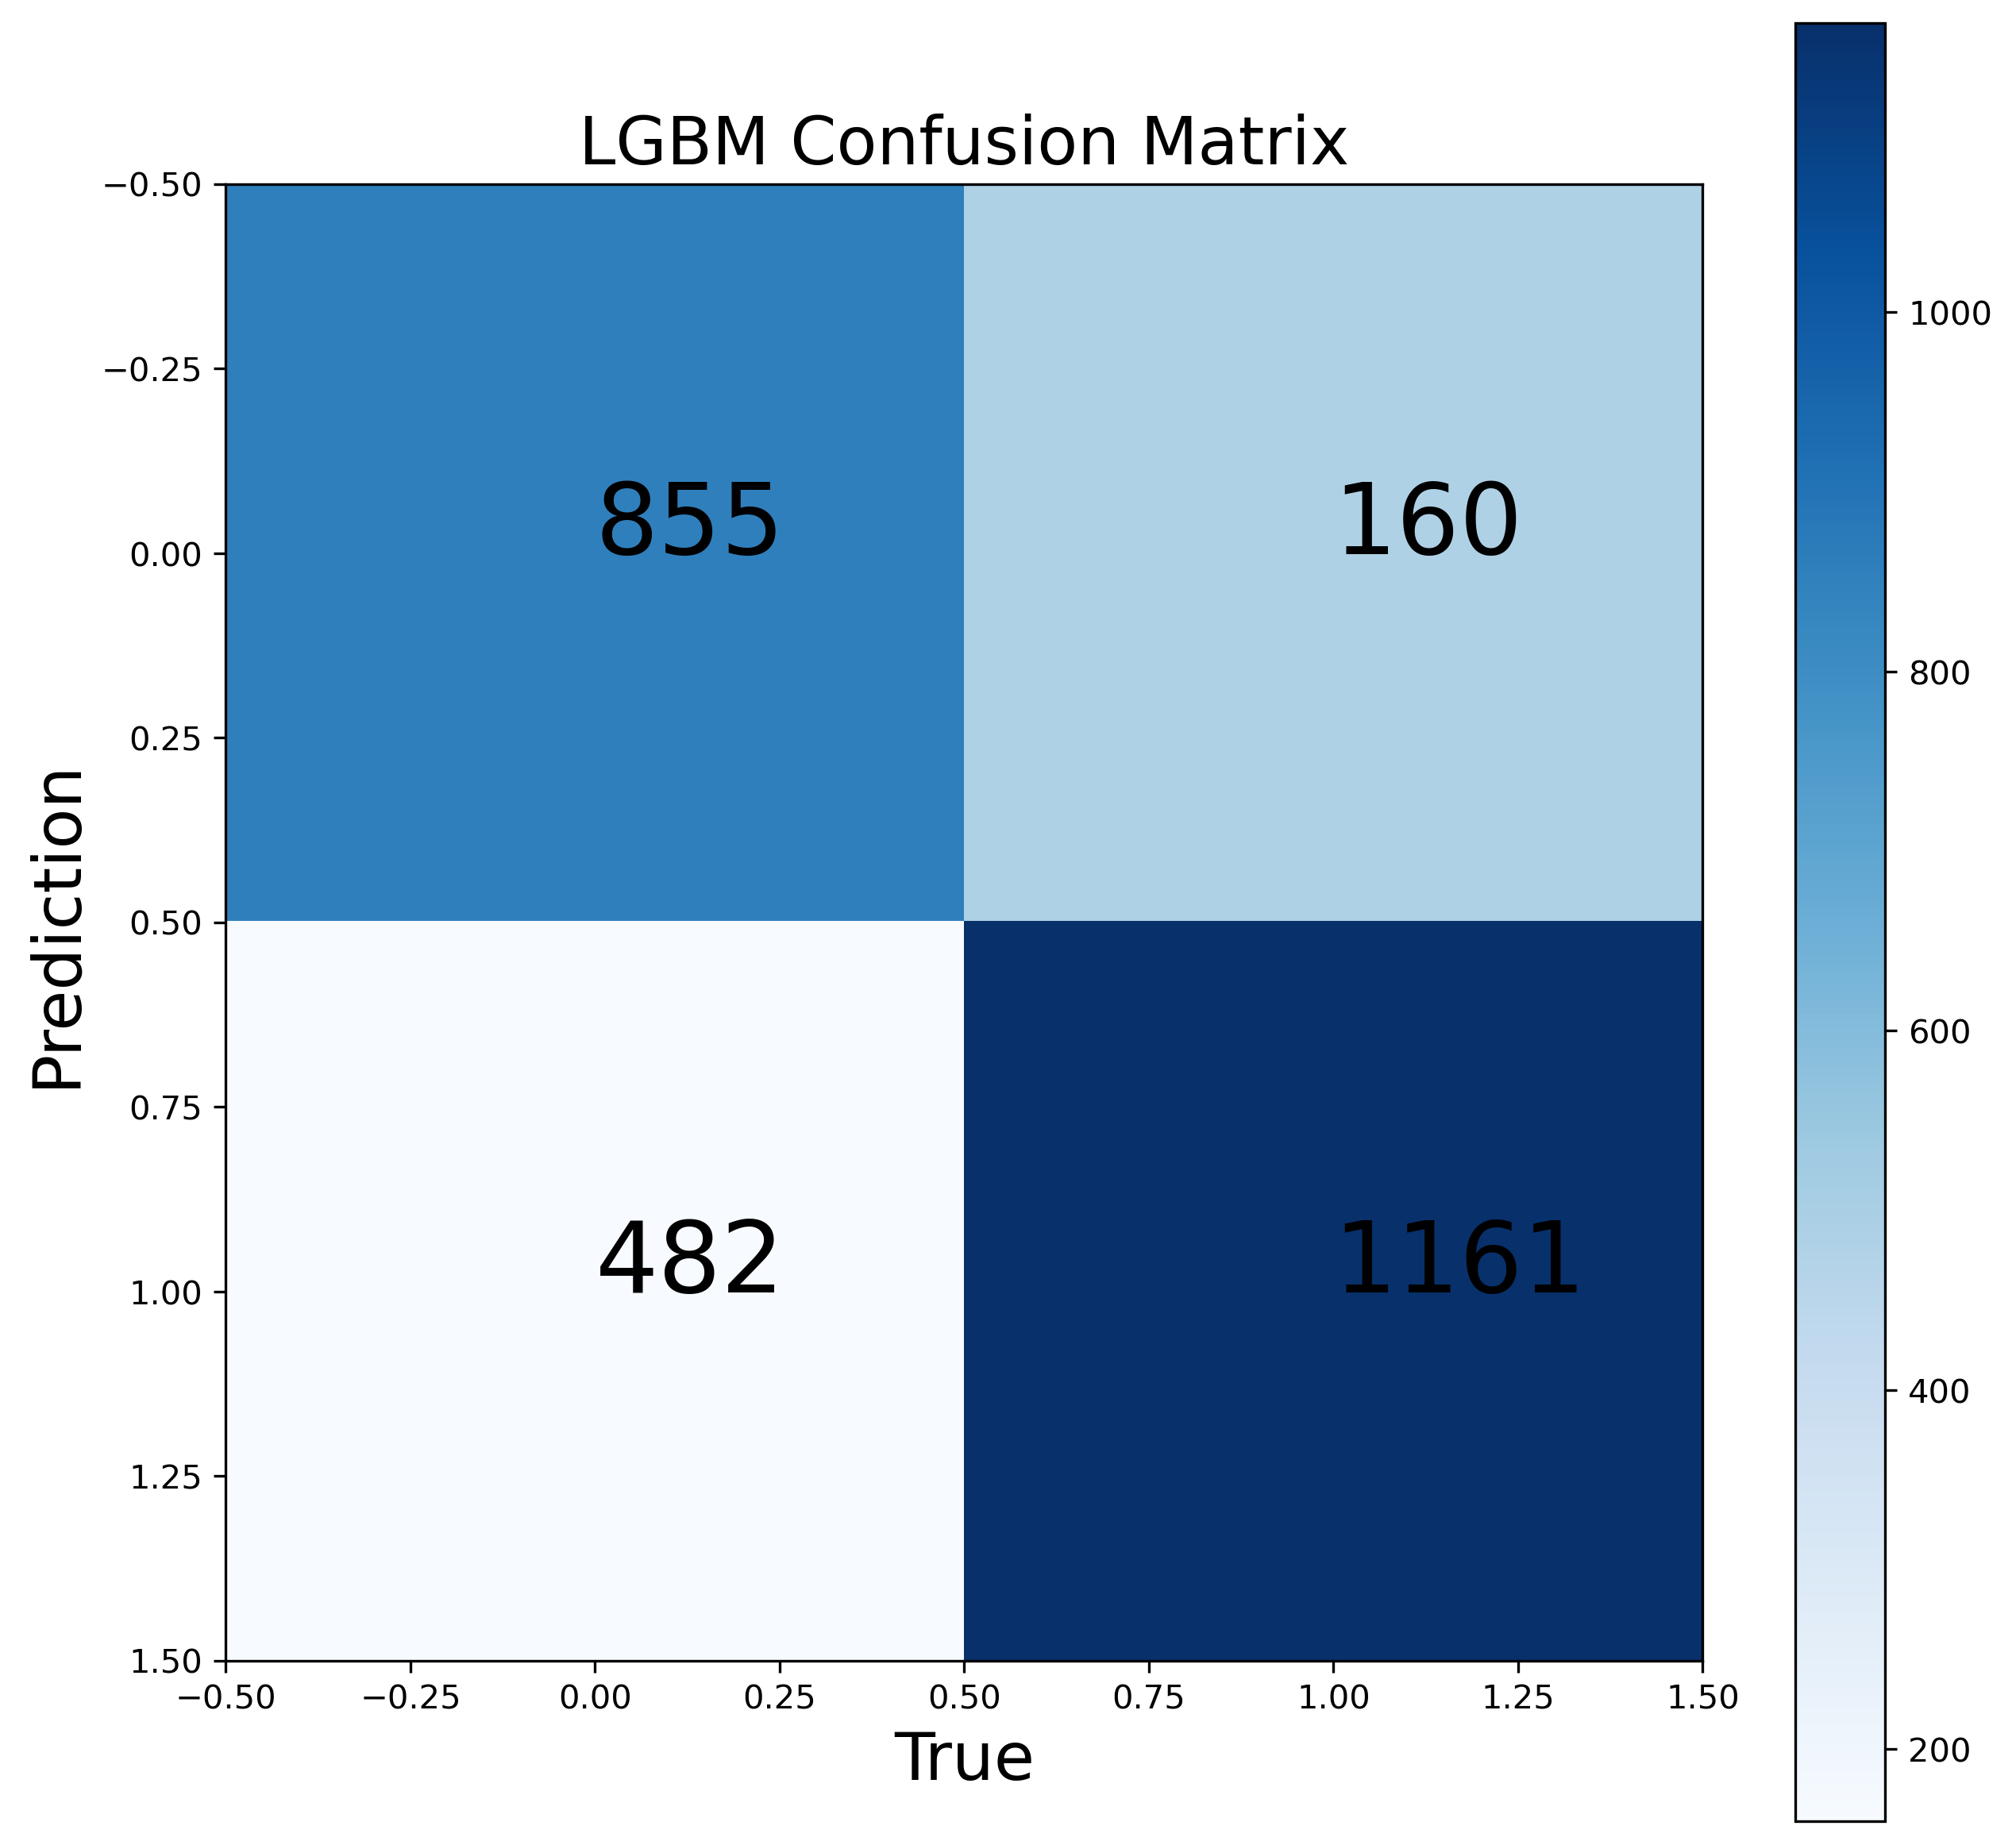

In [19]:
confusion_gbm= confusion_matrix(y_test, predict_gbm)

print("准确率：",accuracy_score(y_test, predict_gbm))
print("精确率：",precision_score(y_test, predict_gbm))
print("召回率：",recall_score(y_test, predict_gbm))
print("F1值:", f1_score(y_test, predict_gbm))
print("AUC: ",roc_auc_score(y_test, predict_gbm))

plt.figure(figsize = (10,10))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion_gbm, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('True',size = 20)
plt.ylabel('Prediction', size = 20)
plt.title('LGBM Confusion Matrix',size = 20)
# 显示数据
for first_index in range(len(confusion_gbm)):    #第几行
    for second_index in range(len(confusion_gbm[first_index])):    #第几列
        plt.text(first_index, second_index, confusion_gbm[first_index][second_index],size = 30)

plt.savefig('LGBM.tif')

Text(0, 0.5, 'TPR')

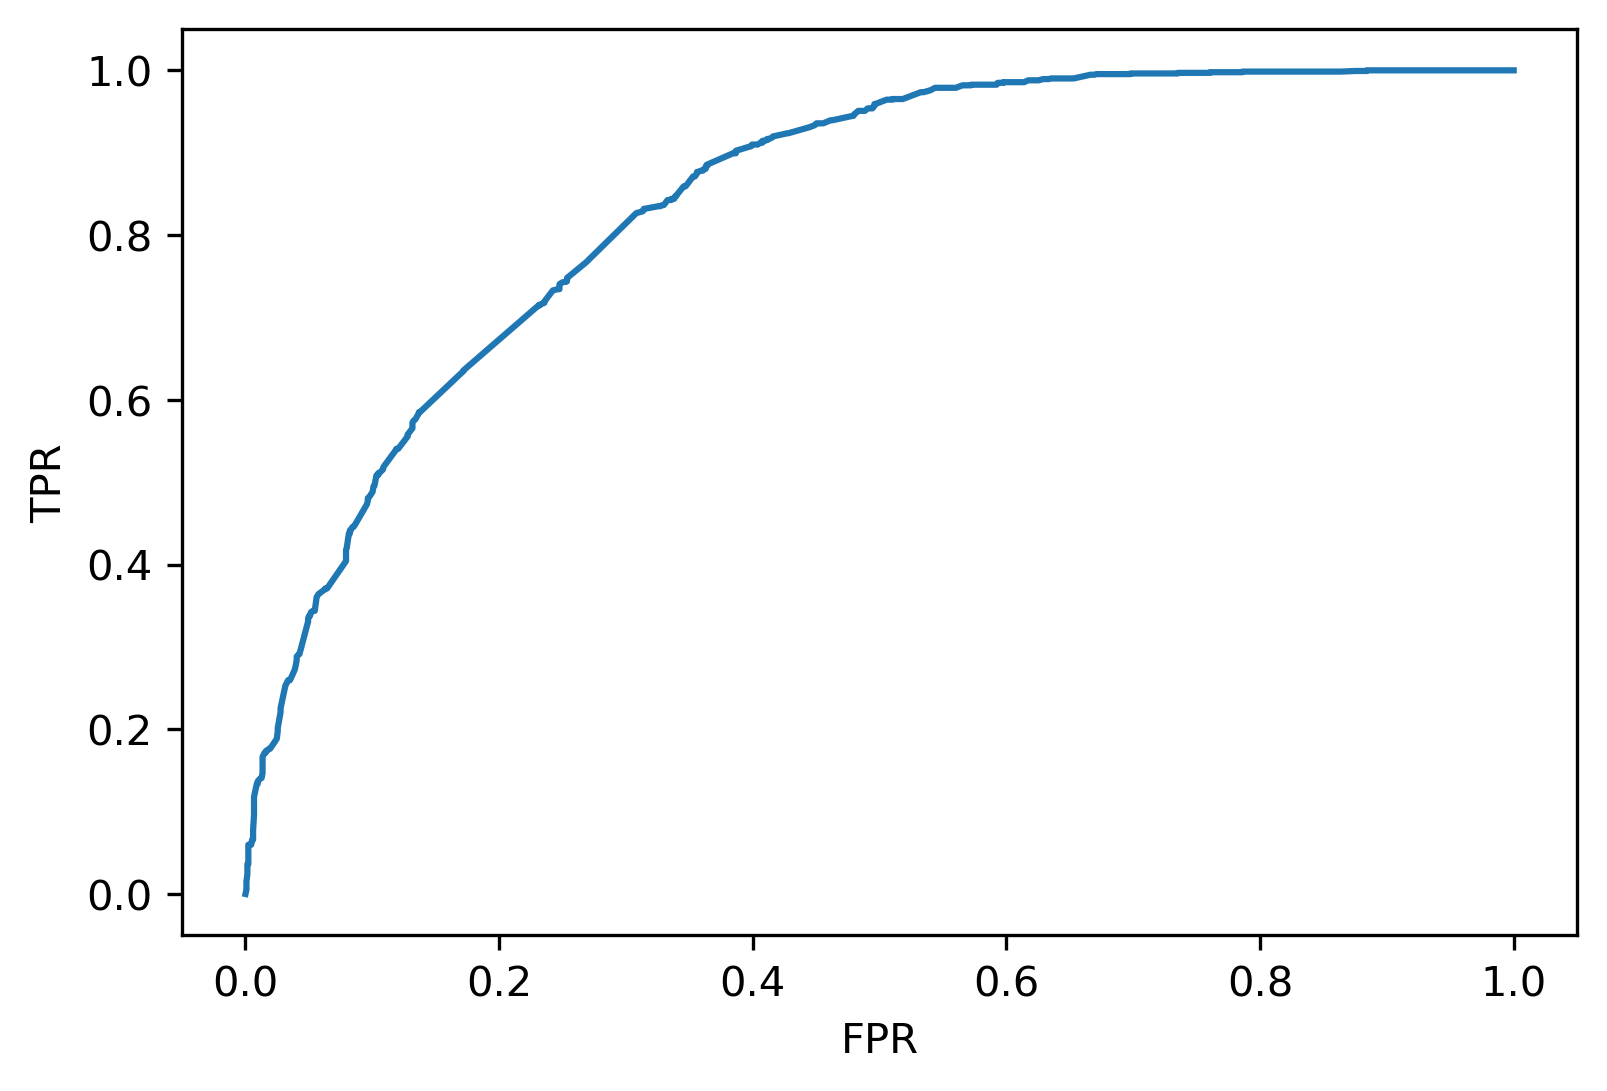

In [20]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,model_gbm.predict_proba(x_test)[:,1])
 
plt.plot(fpr,tpr,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

In [21]:
ax.cla()

NameError: name 'ax' is not defined

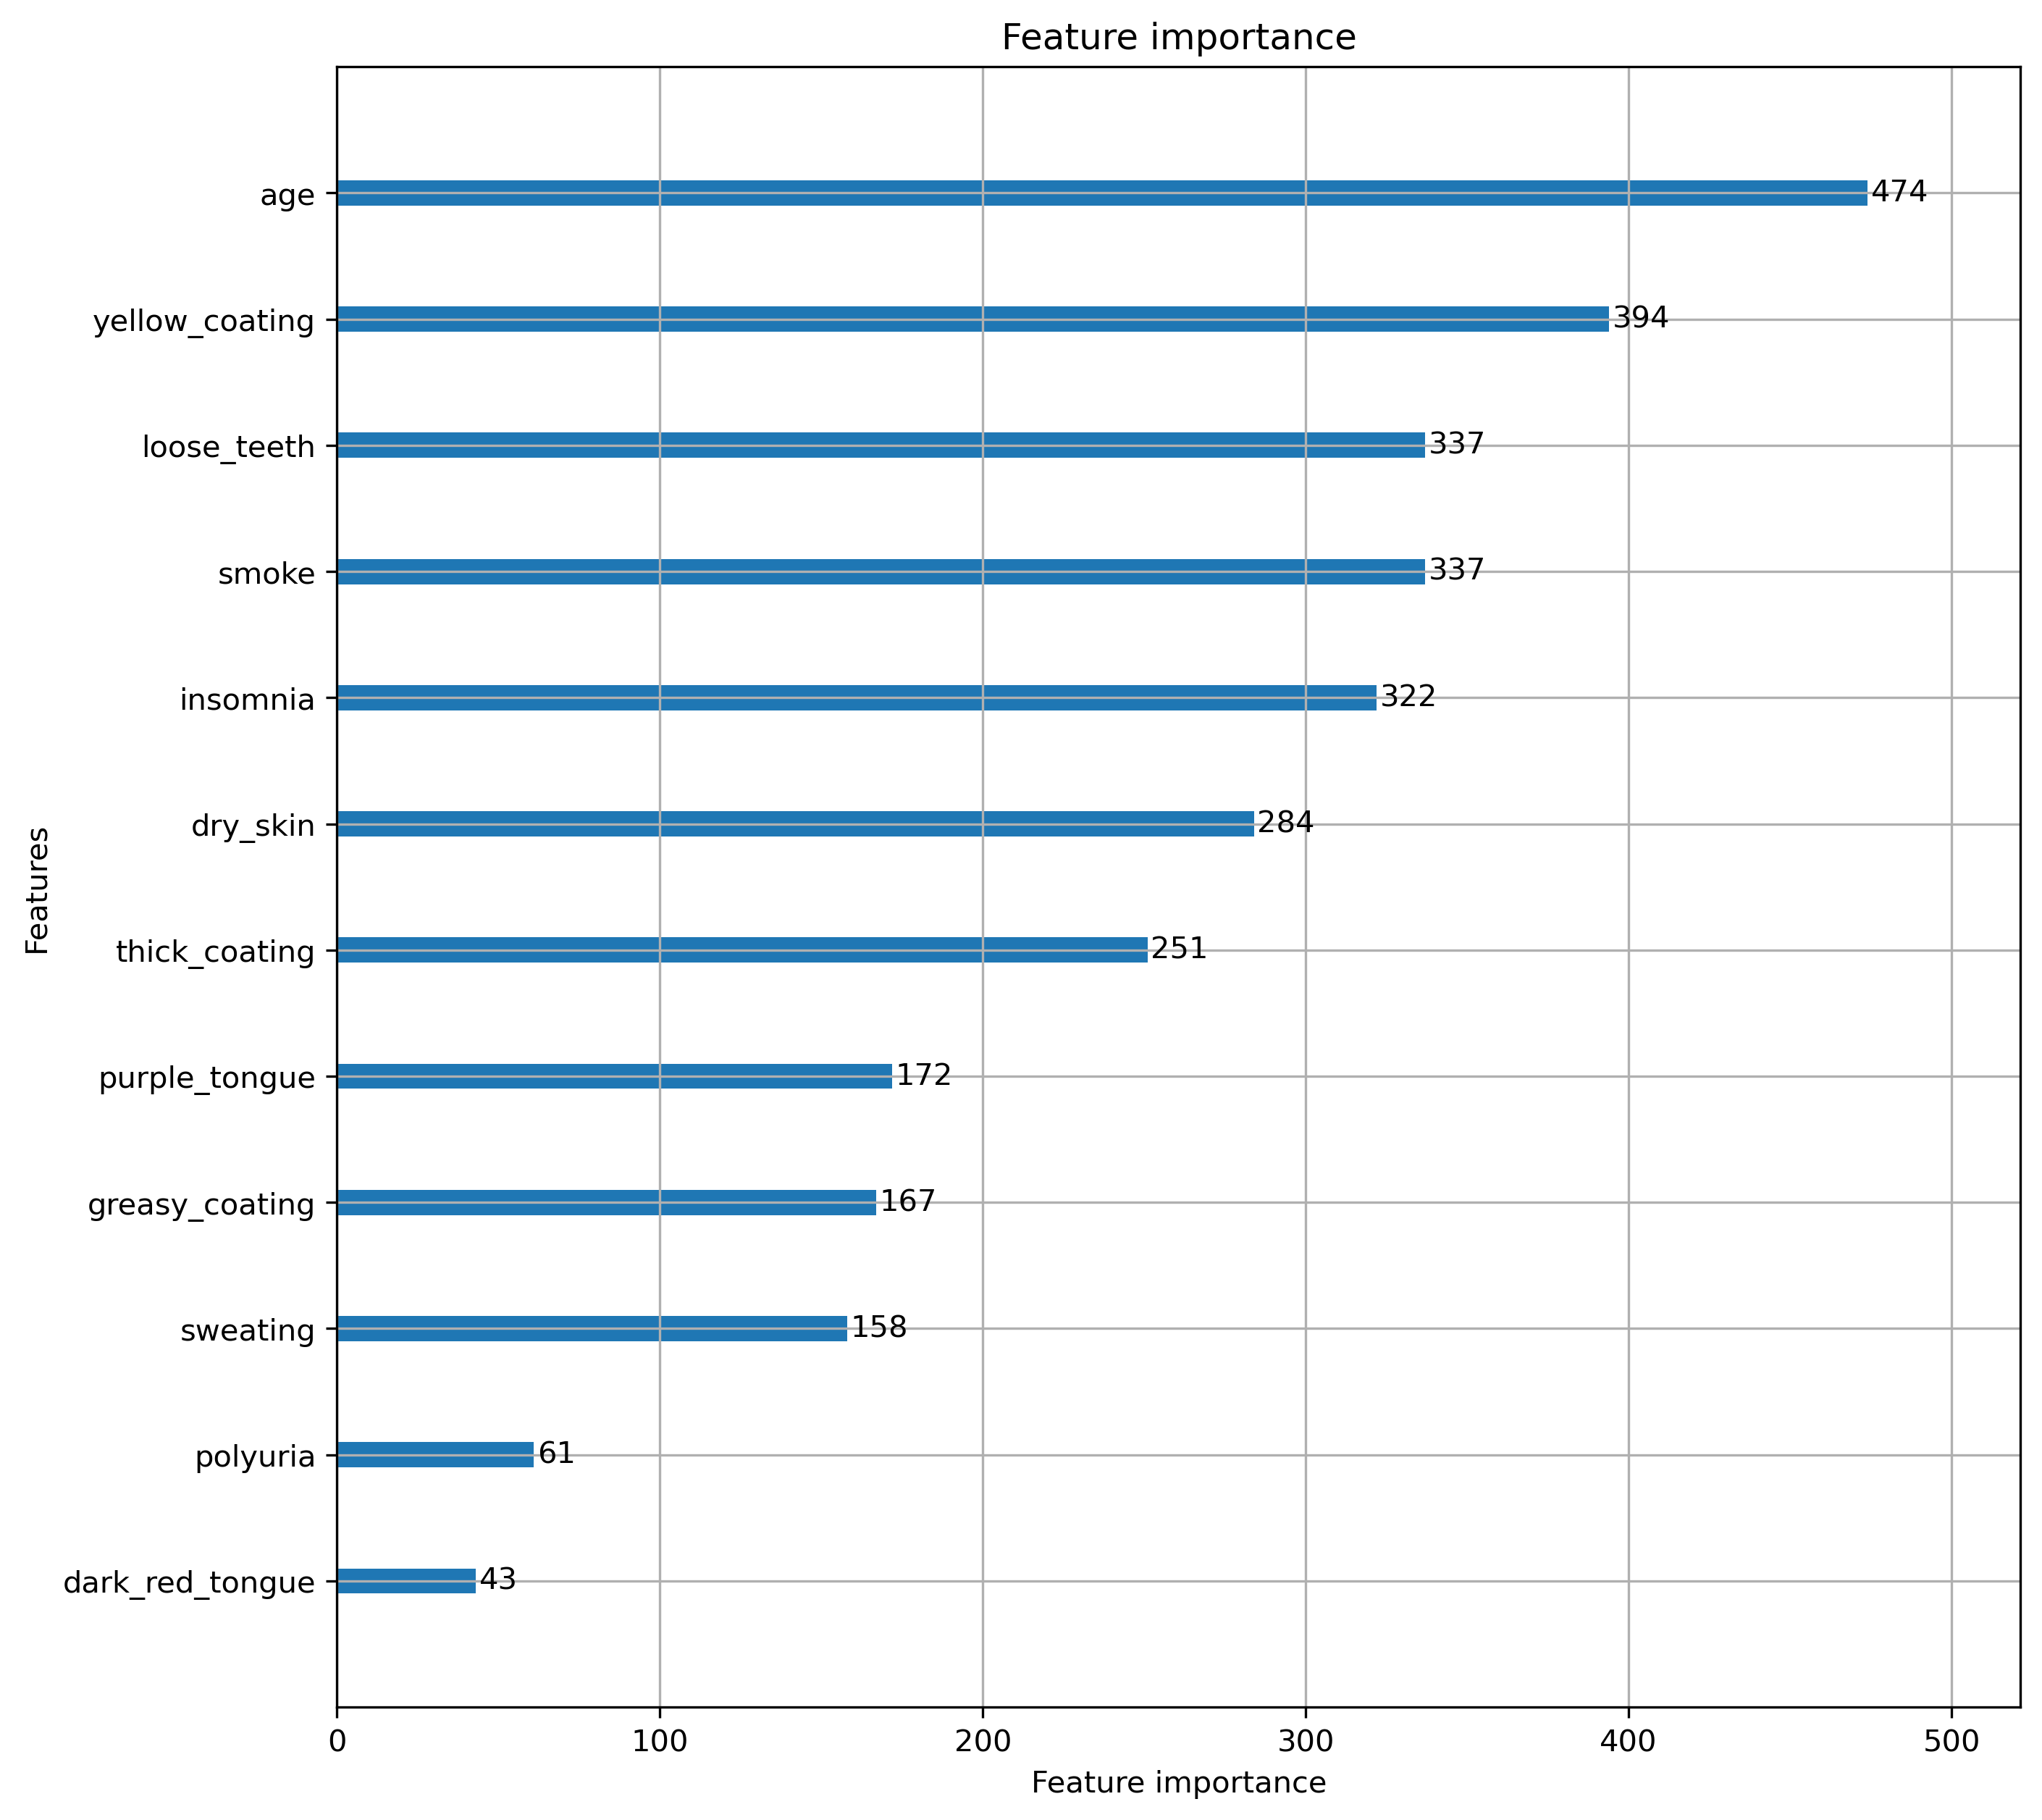

In [ ]:
plt.rcParams["savefig.dpi"] =300
plt.rcParams["figure.dpi"] =300# 高清
# ax.
ax = lgb.plot_importance(model_gbm,figsize=(10,10))
ax.figure.savefig('feaimport.tif')

roc画一起

In [22]:
# logist
fpr_log,tpr_log, thresholds = roc_curve(y_test,log_reg.decision_function(x_test))
# plt.plot(fpr,tpr,label='ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

# 随机森林
fpr_rf,tpr_rf, thresholds = roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
# plt.plot(fpr,tpr,label='ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

# svc
fpr_svc,tpr_svc, thresholds = roc_curve(y_test,model_svc.decision_function(x_test))
# plt.plot(fpr,tpr,label='ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

# lgbm
fpr_lgbm,tpr_lgbm, thresholds = roc_curve(y_test,model_gbm.predict_proba(x_test)[:,1])
# plt.plot(fpr,tpr,label='ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

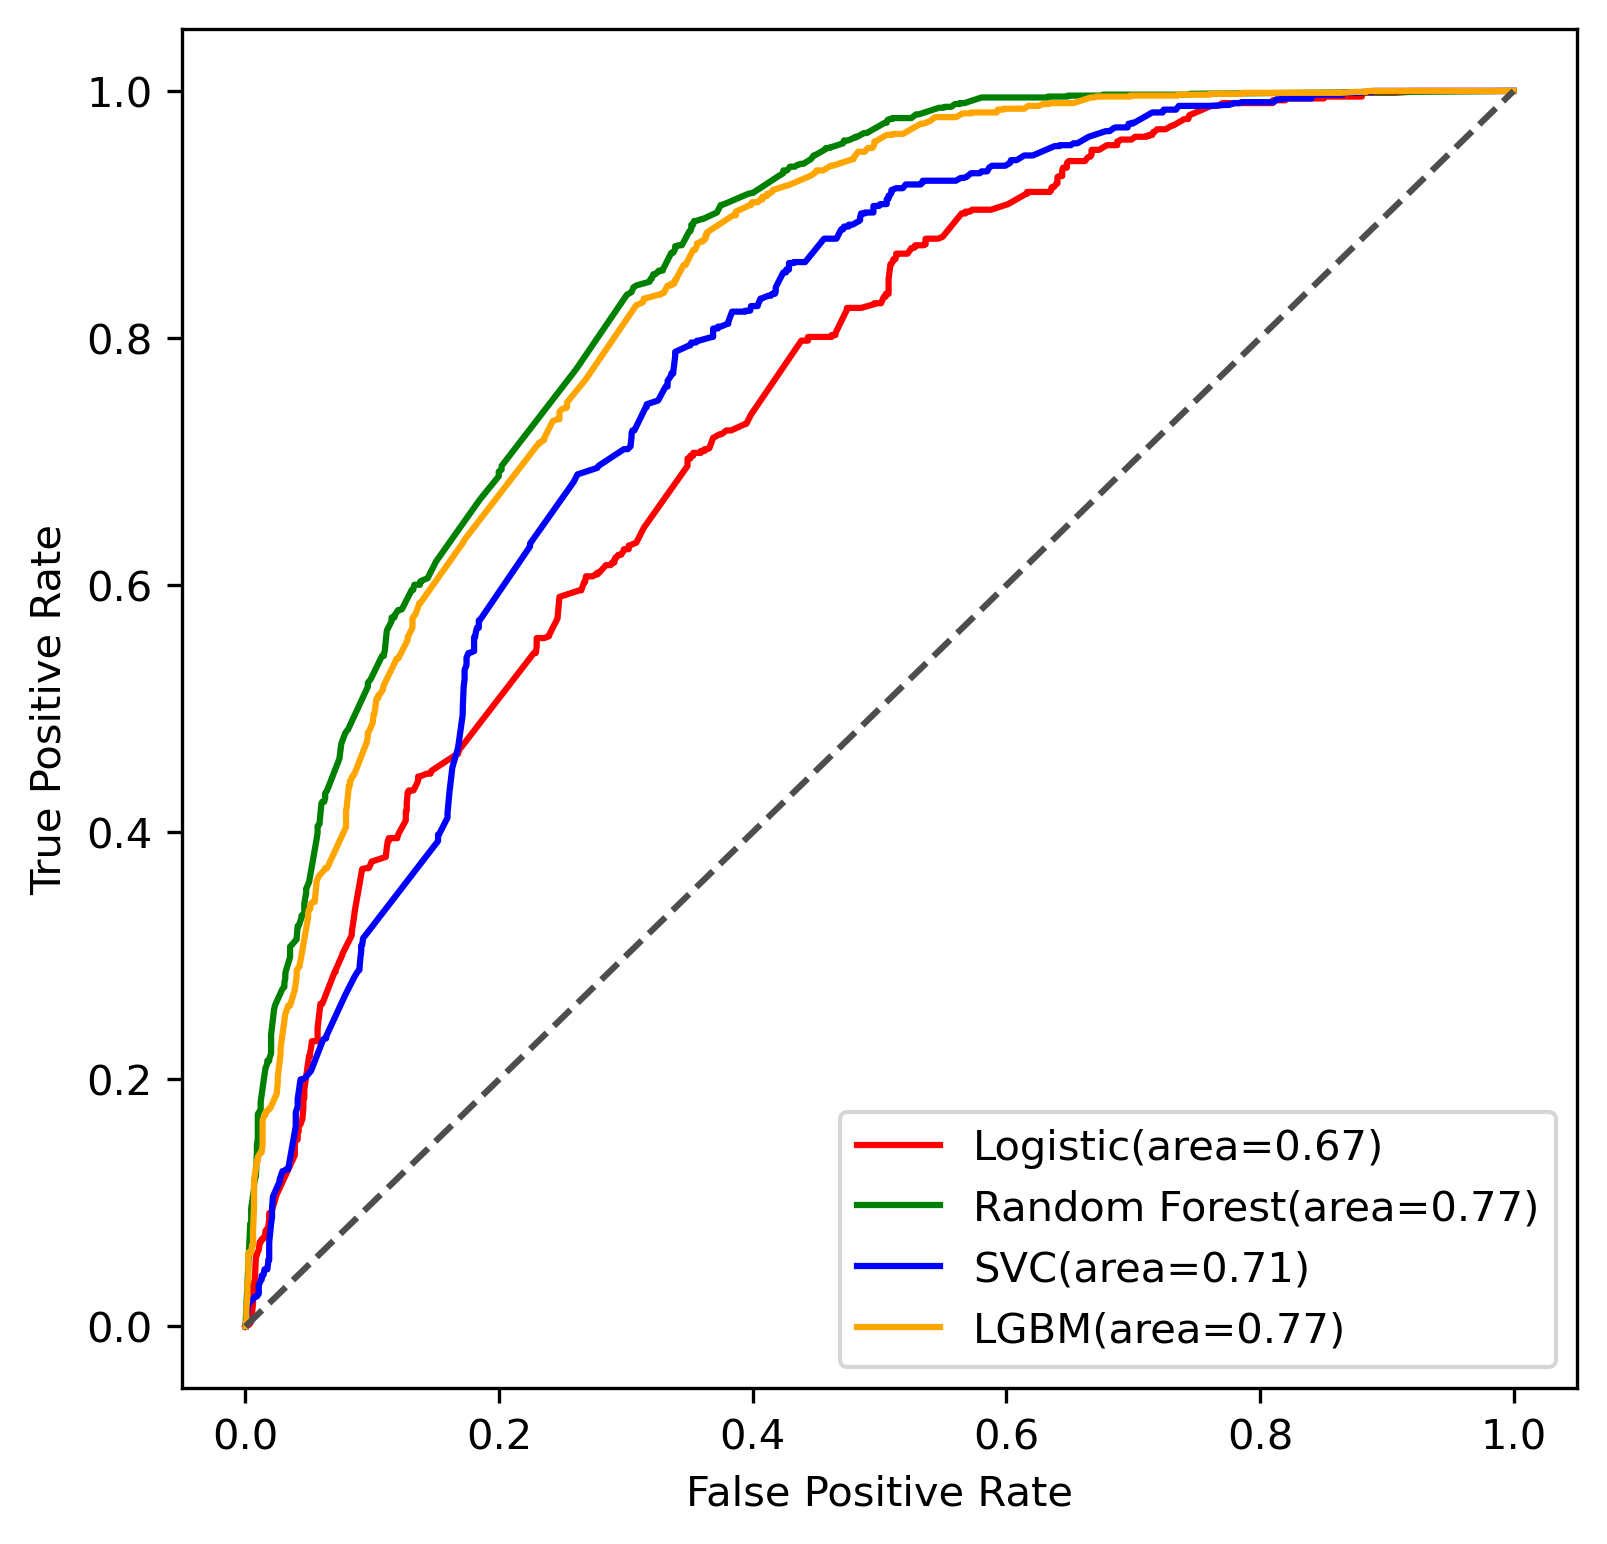

In [23]:
plt.rcParams["savefig.dpi"] =300
plt.rcParams["figure.dpi"] =300# 高清

plt.figure(figsize=(6,6))
plt.plot(fpr_log,tpr_log,color="r",label="Logistic(area=0.67)") #颜色表示
plt.plot(fpr_rf,tpr_rf,color='g',label="Random Forest(area=0.77)") 
plt.plot(fpr_svc,tpr_svc,color='b',label="SVC(area=0.71)") 
plt.plot(fpr_lgbm,tpr_lgbm,color='orange',label="LGBM(area=0.77)") 
plt.plot([0,1],[0,1],ls="--", c=".3")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate") #y轴命名表示
plt.legend()#增加图例
plt.savefig('3dPlot.tif')